In [1]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [2]:
#Default dimensions we found online
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = r'C:\Users\hafiz\Pakistan Sign Language Project\VGG_16_Weights'
# loading up our datasets
train_data_dir = r'C:\Users\hafiz\Pakistan Sign Language Project\PSL (Augmented Dataset)\train' 
validation_data_dir = r'C:\Users\hafiz\Pakistan Sign Language Project\PSL (Augmented Dataset)\validation' 
test_data_dir = r'C:\Users\hafiz\Pakistan Sign Language Project\PSL (Augmented Dataset)\test'
 
# number of epochs to train top model 
epochs = 25 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 50 

In [3]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

In [6]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save(r'C:\Users\hafiz\Pakistan Sign Language Project\VGG_16_Weights\bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 18864 images belonging to 36 classes.


C:\Users\hafiz\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2030: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  1:19:25.350208


In [7]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_test_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_test = int(math.ceil(nb_test_samples / batch_size)) 
 
bottleneck_features_test = vgg16.predict_generator(generator, predict_size_test) 
 
np.save(r'C:\Users\hafiz\Pakistan Sign Language Project\VGG_16_Weights\bottleneck_features_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1656 images belonging to 36 classes.
Time:  0:07:49.173565


In [4]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_validation_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation) 
 
np.save(r'C:\Users\hafiz\Pakistan Sign Language Project\VGG_16_Weights\bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 1656 images belonging to 36 classes.


C:\Users\hafiz\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2030: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:06:59.738821


## Loading of Features

In [4]:
#training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load(r'C:\Users\hafiz\Pakistan Sign Language Project\VGG_16_Weights\bottleneck_features_train.npy') 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 18864 images belonging to 36 classes.


In [5]:
#training data
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_test_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load(r'C:\Users\hafiz\Pakistan Sign Language Project\VGG_16_Weights\bottleneck_features_test.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 1656 images belonging to 36 classes.


In [6]:
#training data
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_validation_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load(r'C:\Users\hafiz\Pakistan Sign Language Project\VGG_16_Weights\bottleneck_features_validation.npy') 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 1656 images belonging to 36 classes.


In [8]:
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])
history = model.fit(train_data, train_labels, 
   epochs=25,
   batch_size=batch_size, 
   validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

C:\Users\hafiz\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
378/378 [==============================] - 12s 31ms/step - loss: 1.6356 - acc: 0.6080 - val_loss: 0.3744 - val_acc: 0.9565
Epoch 2/25
378/378 [==============================] - 10s 26ms/step - loss: 0.5302 - acc: 0.8827 - val_loss: 0.1541 - val_acc: 0.9777
Epoch 3/25
378/378 [==============================] - 9s 24ms/step - loss: 0.3034 - acc: 0.9322 - val_loss: 0.0861 - val_acc: 0.9867
Epoch 4/25
378/378 [==============================] - 10s 26ms/step - loss: 0.2018 - acc: 0.9540 - val_loss: 0.0558 - val_acc: 0.9897
Epoch 5/25
378/378 [==============================] - 10s 26ms/step - loss: 0.1443 - acc: 0.9667 - val_loss: 0.0370 - val_acc: 0.9928
Epoch 6/25
378/378 [==============================] - 10s 26ms/step - loss: 0.1093 - acc: 0.9751 - val_loss: 0.0267 - val_acc: 0.9952
Epoch 7/25
378/378 [==============================] - 10s 27ms/step - loss: 0.0906 - acc: 0.9769 - val_loss: 0.0250 - val_acc: 0.9934
Epoch 8/25
378/378 [==============================] - 10s 26ms/

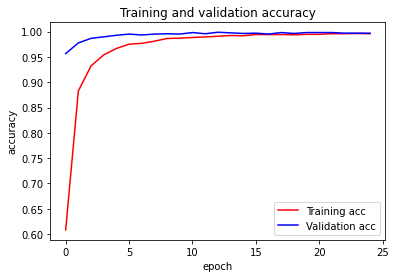

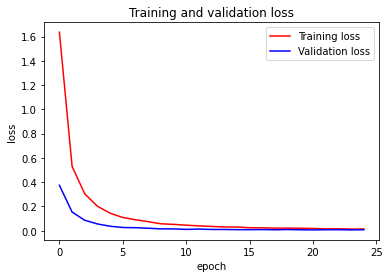

In [9]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [10]:
print(len(test_data))
print(len(test_labels))
model.evaluate(test_data, test_labels)

1656
1656
52/52 [==============================] - 0s 5ms/step - loss: 0.0138 - acc: 0.9976


[0.013821319676935673, 0.9975845217704773]

In [11]:
preds = np.round(model.predict(test_data), 0)
print('rounded test labels: ', preds)

rounded test labels:  [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [12]:
classes = ['AIN', 'ALIF', 'BA', 'BAARI_YAAAY', 'CHAAAY', 'CHOTI-YAY', 'DAAL', 'DDAAAL', 'DO-CHASHMI-HAY', 'FAAA', 'GAAF', 'GHAIN', 'HAMZA', 'HAY', 'KAF', 'KHAY', 'LAAM', 'MIM', 'NUN', 'NUN-GHUNNAH', 'PA', 'QAF', 'RAY', 'SA', 'SAAL', 'SHIN', 'SIN', 'SUAD', 'TAY', 'TAYTAY', 'TOE', 'WAO', 'ZAAL', 'ZAAY', 'ZOE', 'ZUAD']
classification_metrics = metrics.classification_report(test_labels, preds, target_names = classes)
print(classification_metrics)

                precision    recall  f1-score   support

           AIN       1.00      1.00      1.00        46
          ALIF       1.00      1.00      1.00        46
            BA       1.00      1.00      1.00        46
   BAARI_YAAAY       1.00      1.00      1.00        46
        CHAAAY       0.98      1.00      0.99        46
     CHOTI-YAY       1.00      1.00      1.00        46
          DAAL       1.00      1.00      1.00        46
        DDAAAL       1.00      1.00      1.00        46
DO-CHASHMI-HAY       1.00      1.00      1.00        46
          FAAA       1.00      1.00      1.00        46
          GAAF       1.00      1.00      1.00        46
         GHAIN       1.00      0.98      0.99        46
         HAMZA       1.00      1.00      1.00        46
           HAY       1.00      0.98      0.99        46
           KAF       1.00      1.00      1.00        46
          KHAY       1.00      1.00      1.00        46
          LAAM       1.00      1.00      1.00  

In [13]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Normalized confusion matrix


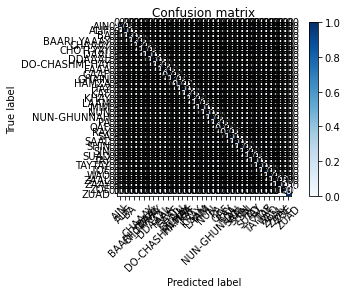

In [14]:
plot_confusion_matrix(confusion_matrix, ['AIN', 'ALIF', 'BA', 'BAARI_YAAAY', 'CHAAAY', 'CHOTI-YAY', 'DAAL', 'DDAAAL', 'DO-CHASHMI-HAY', 'FAAA', 'GAAF', 'GHAIN', 'HAMZA', 'HAY', 'KAF', 'KHAY', 'LAAM', 'MIM', 'NUN', 'NUN-GHUNNAH', 'PA', 'QAF', 'RAY', 'SA', 'SAAL', 'SHIN', 'SIN', 'SUAD', 'TAY', 'TAYTAY', 'TOE', 'WAO', 'ZAAL', 'ZAAY', 'ZOE', 'ZUAD'], normalize = True)

[INFO] loading and preprocessing image…
ID: 0, Label: AIN 100.0%
ID: 1, Label: ALIF 0.0%
ID: 2, Label: BA 0.0%
ID: 3, Label: BAARI_YAAAY 0.0%
ID: 4, Label: CHAAAY 0.0%
ID: 5, Label: CHOTI-YAY 0.0%
Final Decision:
.
..
...
ID: 0, Label: AIN


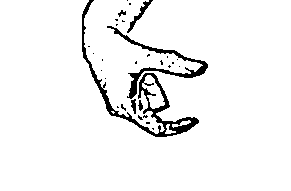

In [24]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image…") 
    image = load_img(file_path, target_size=(224, 224)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image
def test_single_image(path):
    classes = ['AIN', 'ALIF', 'BA', 'BAARI_YAAAY', 'CHAAAY', 'CHOTI-YAY', 'DAAL', 'DDAAAL', 'DO-CHASHMI-HAY', 'FAAA', 'GAAF', 'GHAIN', 'HAMZA', 'HAY', 'KAF', 'KHAY', 'LAAM', 'MIM', 'NUN', 'NUN-GHUNNAH', 'PA', 'QAF', 'RAY', 'SA', 'SAAL', 'SHIN', 'SIN', 'SUAD', 'TAY', 'TAYTAY', 'TOE', 'WAO', 'ZAAL', 'ZAAY', 'ZOE', 'ZUAD']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images) 
    preds = model.predict_proba(bt_prediction)
    for idx, classs, x in zip(range(0,6), classes , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, classs, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices 
    inv_map = {v: k for k, v in class_dictionary.items()} 
    print("ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 
    return load_img(path)
path = r'C:\Users\hafiz\Pakistan Sign Language Project\test_images\22AIN_1.PNG'
test_single_image(path)